In [2]:
!pip install ucimlrepo
!pip install seaborn scikit-learn

# Импорты

In [3]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка данных

### Получение данных

In [4]:
# fetch taiwanese dataset
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572)

# data (as pandas dataframes)
taiwanese_X = taiwanese_bankruptcy_prediction.data.features
taiwanese_y = taiwanese_bankruptcy_prediction.data.targets

In [6]:
# fetch polish dataset
polish_companies_bankruptcy = fetch_ucirepo(id=365)

# data (as pandas dataframes)
polish_X = polish_companies_bankruptcy.data.features
polish_y = polish_companies_bankruptcy.data.targets

### Переименование колонок

In [8]:
# Список новых названий столбцов
new_column_names = [
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold)",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets"
]

# Добавление колонки "year" к новым названиям столбцов
all_columns = ["year"] + new_column_names

# Переименование столбцов, включая сохранение "year"
polish_X.columns = all_columns

In [9]:
taiwanese_y.rename(columns={'Bankrupt?': 'class'}, inplace=True)

<ipython-input-9-c213635b647d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taiwanese_y.rename(columns={'Bankrupt?': 'class'}, inplace=True)


# Анализ данных

## Тайвань

#### X

In [11]:
taiwanese_X

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [32]:
columns_to_extract = [
    ' ROA(A) before interest and % after tax',
    ' Total debt/Total net worth',
    ' Working Capital to Total Assets',
    ' Retained Earnings to Total Assets',
    ' Total Asset Turnover',
    ' Operating Profit Rate',
]

# Создаем новый DataFrame, содержащий только выбранные столбцы
taiwanese_X_sub = taiwanese_X[columns_to_extract]

# Показываем первые несколько строк нового DataFrame
taiwanese_X_sub

,ROA(A) before interest and % after tax,Total debt/Total net worth,Working Capital to Total Assets,Retained Earnings to Total Assets,Total Asset Turnover,Operating Profit Rate
0,0.424389,0.021266,0.672775,0.903225,0.086957,0.998969
1,0.538214,0.012502,0.751111,0.931065,0.064468,0.998946
2,0.499019,0.021248,0.829502,0.909903,0.014993,0.998857
3,0.451265,0.009572,0.725754,0.906902,0.089955,0.998700
4,0.538432,0.005150,0.751822,0.913850,0.175412,0.998973
...,...,...,...,...,...,...
6814,0.539468,0.006655,0.817769,0.925611,0.103448,0.998992
6815,0.538269,0.004623,0.793387,0.932629,0.103448,0.998992
6816,0.533744,0.001392,0.866047,0.932000,0.106447,0.998984
6817,0.559911,0.003816,0.832340,0.939613,0.109445,0.999074


#### y

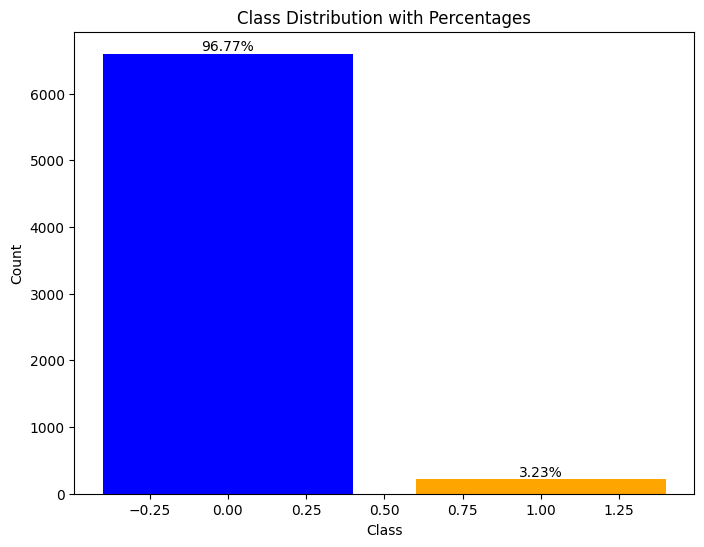

In [20]:
# Calculate the percentage distribution
class_counts = taiwanese_y['class'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts, color=['blue', 'orange'])

for bar, percentage in zip(bars, class_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Class Distribution with Percentages')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Польша

#### X

In [35]:
polish_X_sub = polish_X[polish_X['year'] == 5]
columns_to_keep = [
    'net profit / total assets',
    'total liabilities / total assets',
    'working capital / total assets',
    'retained earnings / total assets',
    'total sales / total assets',
    'profit on operating activities / total assets'
]

polish_X_sub = polish_X_sub[columns_to_keep]
polish_X_sub

,net profit / total assets,total liabilities / total assets,working capital / total assets,retained earnings / total assets,total sales / total assets,profit on operating activities / total assets
37495,0.088238,0.55472,0.011340,0.342040,1.44930,0.135230
37496,-0.006202,0.48465,0.232980,0.000000,1.27570,0.001289
37497,0.130240,0.22142,0.577510,0.187640,1.16980,0.145860
37498,-0.089951,0.88700,0.269270,-0.073957,1.27540,0.000000
37499,0.048179,0.55041,0.107650,0.000000,1.51500,0.067616
...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,0.000000,1.67680,0.040401
43401,-0.578050,0.96702,-0.800850,-0.578050,4.39120,-0.534920
43402,-0.179050,1.25530,-0.275990,-0.179050,1.95150,0.176700
43403,-0.108860,0.74394,0.015449,-0.108860,0.83553,-0.099950


#### y

In [39]:
polish_y_sub = polish_y.loc[polish_X_sub.index]
polish_y_sub

,class
37495,0
37496,0
37497,0
37498,0
37499,0
...,...
43400,1
43401,1
43402,1
43403,1


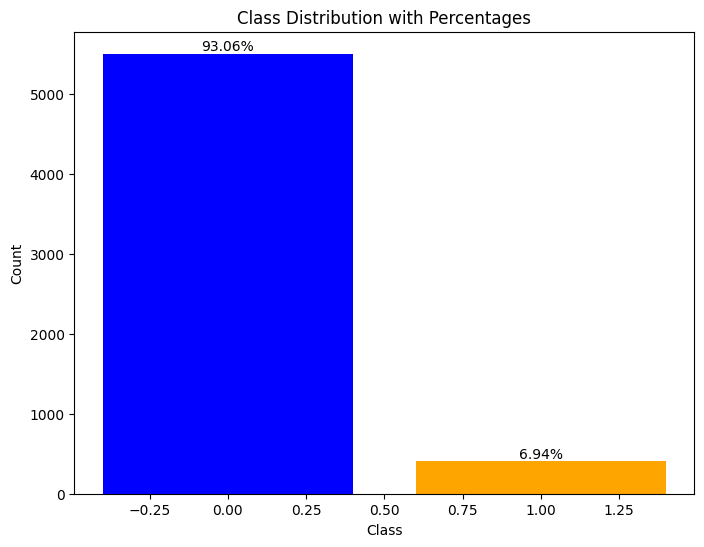

In [41]:
# Calculate the percentage distribution
class_counts = polish_y_sub['class'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts, color=['blue', 'orange'])

for bar, percentage in zip(bars, class_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Class Distribution with Percentages')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Сравнительный анализ данных

# Построение моделей

Использовать SMOTE?

### Модель Альтмана (Z-score)

## Логистическая регрессия

## Дискриминантный анализ

## Наша модель